<a href="https://colab.research.google.com/github/WoogiWooks/DLCV/blob/main/5_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SSD (Single Shot Detector)**
* One-Stage Detector
    * 작은 image에 대한 Detection 성능이 떨어져 Augmentation이 중요
    * 이후 FPN의 등장으로 One-Stage Detector의 문제를 해결함
* Two-Stage Detector에서 쓰인 Anchor Box를 Object Detection하는데 직접 사용함
* 서로 다른 크기의 Feature Map들에 대해서 같은 크기의 Anchor Box를 사용해 Detection 수행
* 300x300 혹은 512x512 이미지를 input으로 받음
     * 512가 이미지가 크기에 mAP 성능은 높지만 수행시간인 FPS가 300을 받을때보다 떨어짐

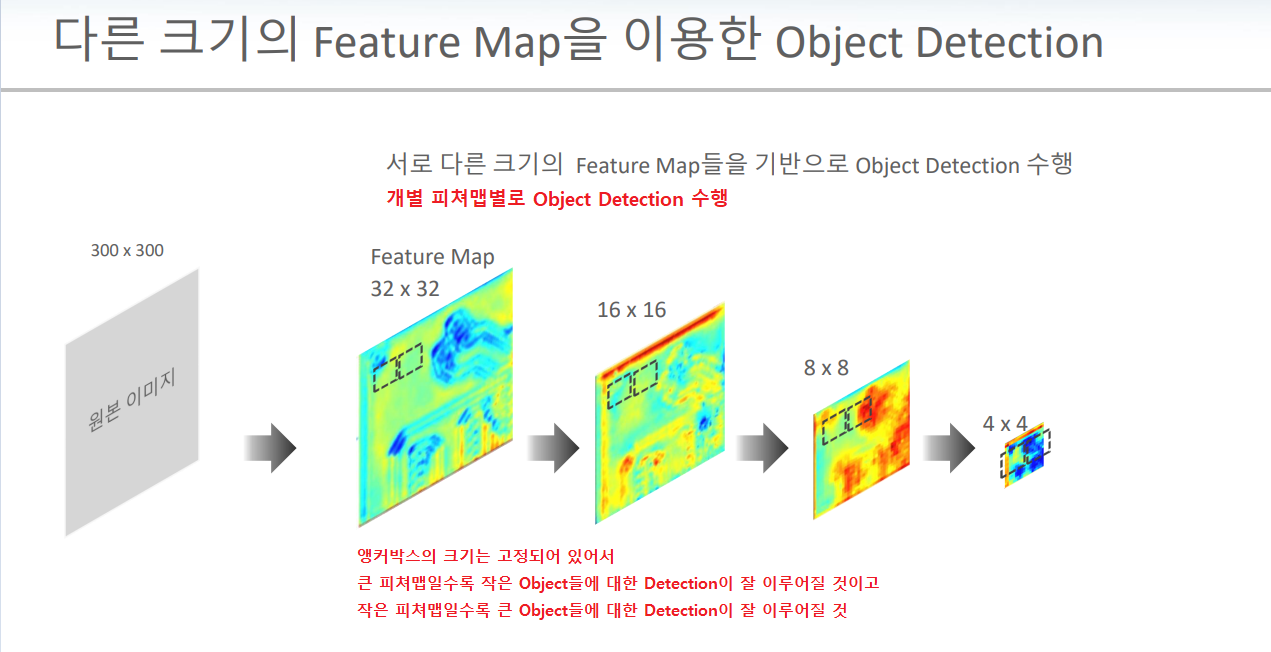

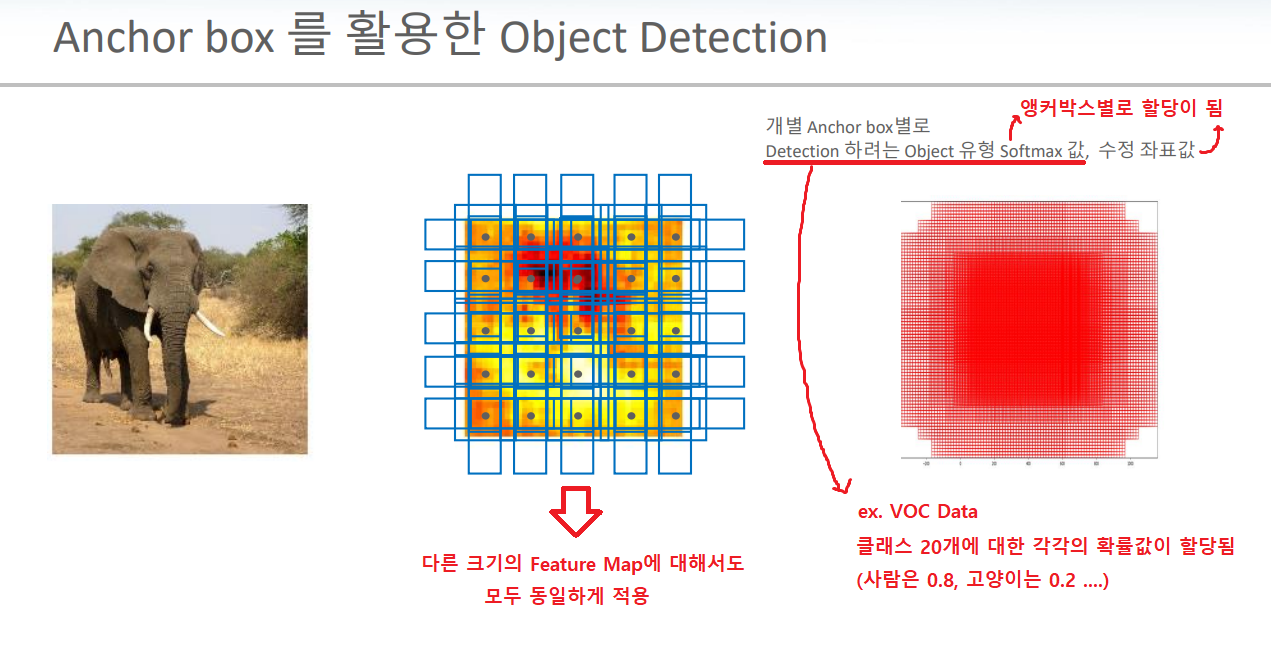

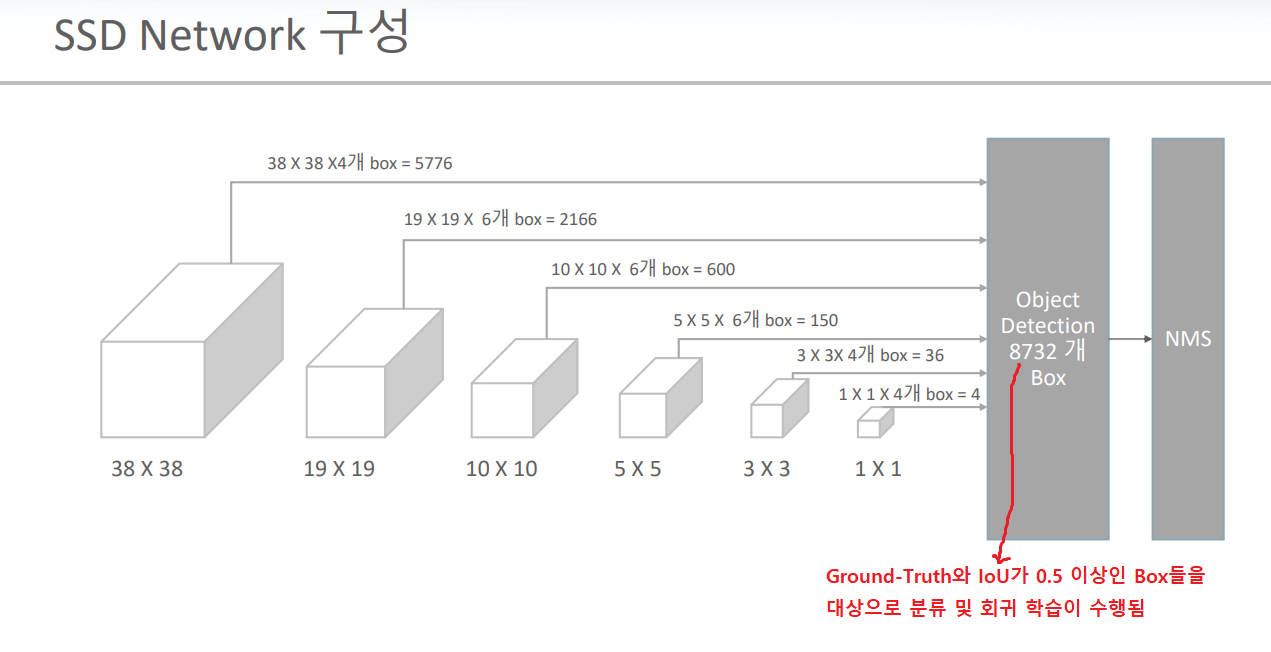

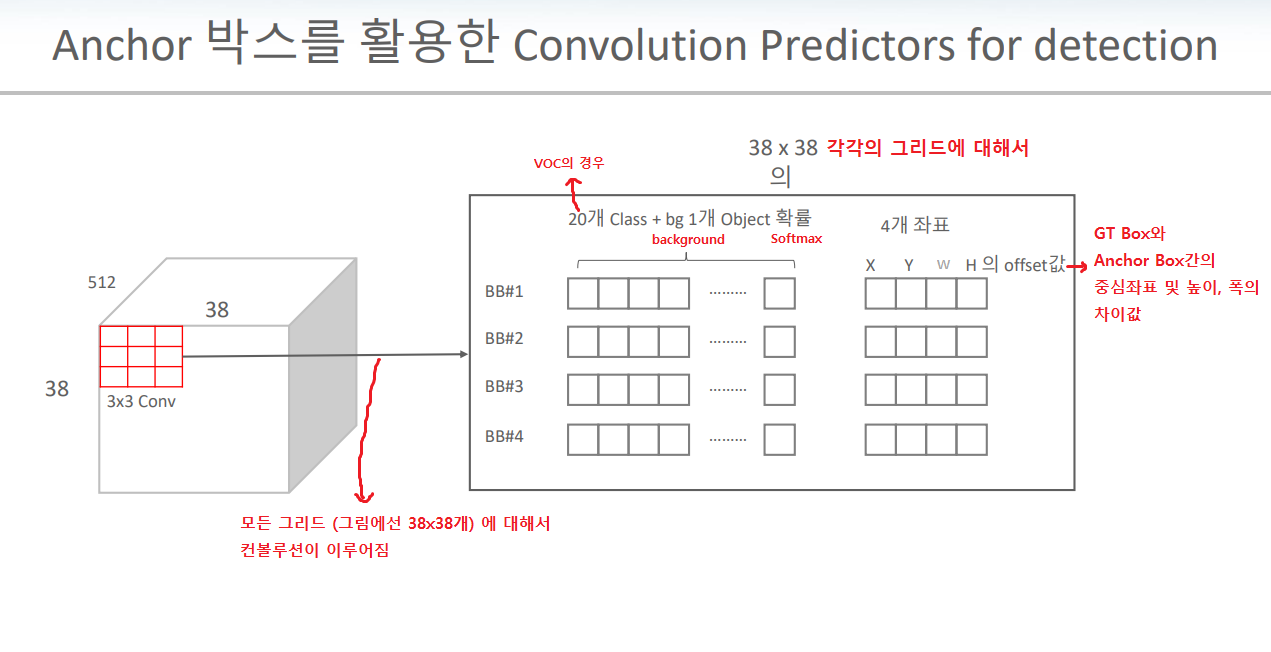

## **OpenCV DNN을 이용하여 SSD 사용**
* Tensorflow 에서 Pretrained 된 모델 파일을 OpenCV에서 로드하여 사용

### **Inception Backbone**

#### **Image Inference**

In [ ]:
# 입력이미지 다운로드

!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-02-08 11:54:42--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2022-02-08 11:54:43 (10.5 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [ ]:
# Pretrained 모델 다운로드

!mkdir ./pretrained

!wget -O ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz 

!tar -xvf ./pretrained/ssd_inception*.tar.gz -C ./pretrained

# 모델에 대한 config 파일 다운로드

!wget -O ./pretrained/ssd_config_01.pbtxt  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt

--2022-02-08 11:55:59--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.204.128, 2607:f8b0:400c:c15::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278126337 (265M) [application/x-tar]
Saving to: ‘./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz’

./pretrained/ssd_in 100%[===================>] 265.24M   137MB/s    in 1.9s    

2022-02-08 11:56:01 (137 MB/s) - ‘./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz’ saved [278126337/278126337]

ssd_inception_v2_coco_2017_11_17/
ssd_inception_v2_coco_2017_11_17/model.ckpt.index
ssd_inception_v2_coco_2017_11_17/model.ckpt.meta
ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb
ssd_inception_v2_coco_2017_11_17/model.ckpt.data-00000-of-00001
ssd_inception_v2_coco_2017_11_17/saved_model/
ssd_inception_v2_coc

In [ ]:
import cv2

cv_net = cv2.dnn.readNetFromTensorflow('/content/pretrained/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb',
                                      '/content/pretrained/ssd_config_01.pbtxt')

In [ ]:
# Coco 데이터셋 클래스id별 이름 지정

labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


(1, 1, 100, 7)
person: 0.9696 1
person: 0.9660 1
person: 0.8916 1
person: 0.6298 1
car: 0.8609 3
car: 0.7223 3
car: 0.7184 3
car: 0.7095 3
car: 0.5949 3
car: 0.5511 3


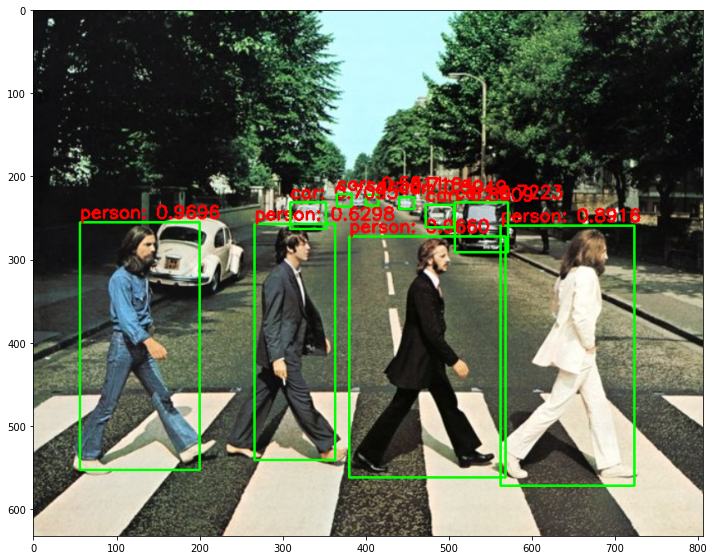

In [ ]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/content/data/beatles01.jpg')

# 원본 이미지 (633, 806)를 네트웍에 입력시에는 (300, 300)로 resize 되며 0~1 사이의 값으로 스케일링되어 위치가 표기됨
# 이후 결과가 출력되면 resize된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
rows = img.shape[0]
cols = img.shape[1]
# cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
draw_img = img.copy()

# 원본 이미지 배열을 사이즈 (300, 300)으로, BGR을 RGB로 변환하여 배열 입력
cv_net.setInput(cv2.dnn.blobFromImage(img,  size=(300, 300), swapRB=True, crop=False))
# Object Detection 수행하여 결과를 cv_out으로 반환 
cv_out = cv_net.forward()
print(cv_out.shape)

# bounding box의 테두리와 caption 글자색 지정
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# detected 된 object들을 iteration 하면서 정보 추출
for detection in cv_out[0,0,:,:]:
    score = float(detection[2])
    class_id = int(detection[1])
    # detected된 object들의 score가 0.4 이상만 추출
    if score > 0.4:
        # detected된 object들은 image 크기가 (300, 300)으로 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
        caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
        
        #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
        print(caption, class_id)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [ ]:
import time

def get_detected_img(cv_net, img_array, score_threshold, is_print=True):
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    draw_img = img_array.copy()
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, size=(300, 300), swapRB=True, crop=False))
    
    start = time.time()
    cv_out = cv_net.forward()
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    # detected 된 object들을 iteration 하면서 정보 추출
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        # detected된 object들의 score가 0.4 이상만 추출
        if score > score_threshold:
            # detected된 object들은 image 크기가 (300, 300)으로 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
            caption = "{}: {:.4f}".format(labels_to_names[class_id], score)

            #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")
    
    draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

    return draw_img

Detection 수행시간: 0.37 초


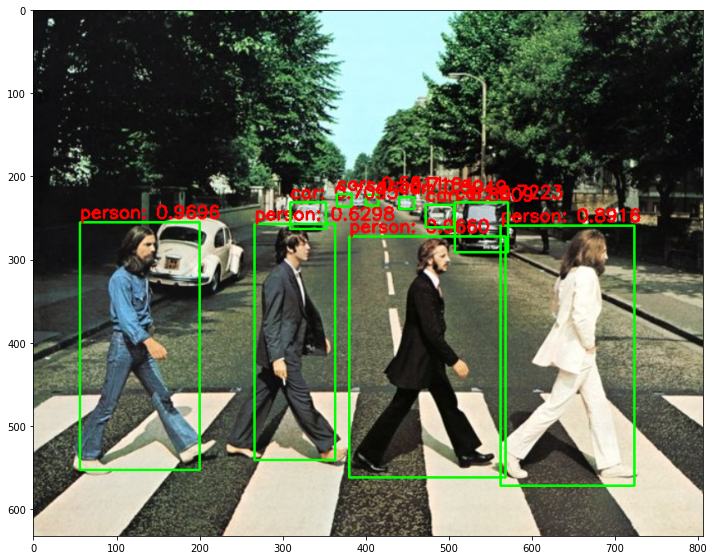

In [ ]:
# image 로드 
img = cv2.imread('/content/data/beatles01.jpg')

#coco dataset 클래스명 매핑

# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net, img, score_threshold=0.4, is_print=True)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

#### **Video Inference**

In [ ]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2022-02-08 12:10:10--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2022-02-08 12:10:10--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2022-02-08 12:10:10--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [ ]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        returned_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, is_print=True)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [ ]:
do_detected_video(cv_net, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_incept.mp4', 0.2, False)

총 Frame 갯수: 58
Detection 수행시간: 0.37 초
Detection 수행시간: 0.39 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.4 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.39 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37

### **Mobilenet v3 Backbone**
* SSD + Mobilenet v3 backbone은 opencv dnn 모듈이 아니라 dnn_DetectionModel() 함수로 생성 가능하며, 이를 사용하기 위해서는 OpenCV의 버전을 Upgrade해야함.
* Mobilenet 기반의 SSD 모델은 CPU 기반에서도 빠른 처리 속도를 보임

#### **Image Inference**

In [ ]:
print(cv2.__version__)

4.1.2


In [ ]:
!pip install opencv-python==4.5.2.54

     |████████████████████████████████| 51.0 MB 164 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!mkdir ./pretrained_mobile
!wget -O ./pretrained_mobile/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
!wget -O ./pretrained_mobile/ssd_config_02.pbtxt https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt

!!tar -xvf ./pretrained_mobile/ssd_mobilenet*.tar.gz -C ./pretrained_mobile 

--2022-02-08 12:17:25--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.204.128, 2607:f8b0:400c:c15::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49318766 (47M) [application/gzip]
Saving to: ‘./pretrained_mobile/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’

./pretrained_mobile 100%[===================>]  47.03M  75.9MB/s    in 0.6s    

2022-02-08 12:17:25 (75.9 MB/s) - ‘./pretrained_mobile/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’ saved [49318766/49318766]

--2022-02-08 12:17:25--  https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 18

['ssd_mobilenet_v3_large_coco_2020_01_14/pipeline.config',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.index',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.data-00000-of-00001',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.tflite',
 'ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
 'ssd_mobilenet_v3_large_coco_2020_01_14/checkpoint',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.meta',
 'ssd_mobilenet_v3_large_coco_2020_01_14/']

In [ ]:
# 해당 SSD 모델은 image pixel값을 -1~1 사이로 정규화하고 image size는 (320, 320) 으로 설정.

import cv2

cv_net_m = cv2.dnn_DetectionModel('/content/pretrained_mobile/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
                                      '/content/pretrained_mobile/ssd_config_02.pbtxt')
cv_net_m.setInputSize(320, 320)
cv_net_m.setInputScale(1.0 / 127.5)
cv_net_m.setInputMean((127.5, 127.5, 127.5))
cv_net_m.setInputSwapRB(True)

<dnn_Model 0x7f372fc757f0>

In [ ]:
# detect() 메소드는 입력 이미지를 받아 특정 Confidence Threshold 이상의 모든 inference 결과를 반환함

img = cv2.imread('/content/data/beatles01.jpg')
draw_img = img.copy()

classes, confidences, boxes = cv_net_m.detect(img, confThreshold=0.5)

In [ ]:
print(classes, "\n")  # confidence score 순으로 나열됨
print(confidences, "\n")
print(boxes)    # xmin, ymin, width, height 형식으로 나옴

[[1]
 [1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]] 

[[0.7795709 ]
 [0.7573837 ]
 [0.75332576]
 [0.71246046]
 [0.6756758 ]
 [0.6396257 ]
 [0.5794208 ]
 [0.5773531 ]
 [0.553491  ]
 [0.5314793 ]
 [0.50632125]] 

[[ 48 258 154 291]
 [213 252 158 298]
 [386 266 167 300]
 [560 251 153 322]
 [496 226  80  67]
 [451 227  28  21]
 [472 226  43  35]
 [375 219  17  17]
 [415 220  18  17]
 [314 227  38  23]
 [258 259 101 268]]


In [ ]:
# 시각화 위한 레이블

labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

person: 0.7796 1 [ 48 258 154 291]
person: 0.7574 1 [213 252 158 298]
person: 0.7533 1 [386 266 167 300]
person: 0.7125 1 [560 251 153 322]


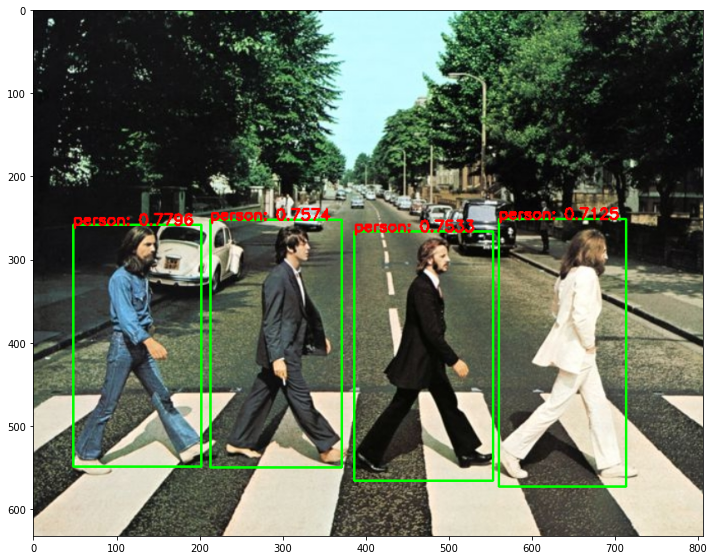

In [ ]:
# 시각화

import matplotlib.pyplot as plt

green_color=(0, 255, 0)
red_color=(0, 0, 255)

for class_id, confidence_score, box in zip(classes.flatten(), confidences.flatten(), boxes):
    if confidence_score > 0.7:
      caption = "{}: {:.4f}".format(labels_to_names[class_id], confidence_score)
      # box 반환 좌표값은 정수형 위치 좌표임. xmin, ymin, width, height임에 유의 
      cv2.rectangle(draw_img, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), color=green_color, thickness=2)
      cv2.putText(draw_img, caption, (box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, red_color, 2)
      print(caption, class_id, box)  

draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

In [ ]:
print(classes, "\n")
print(classes.flatten())

[[1]
 [1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]] 

[1 1 1 1 3 3 3 3 3 3 1]


In [ ]:
# 함수로 생성

def get_cv_detection_model(pretrained_path, config_path):
  cv_net = cv2.dnn_DetectionModel(pretrained_path, config_path)
  cv_net.setInputSize(320, 320)
  cv_net.setInputScale(1.0 / 127.5)
  cv_net.setInputMean((127.5, 127.5, 127.5))
  cv_net.setInputSwapRB(True)

  return cv_net


import time 
def get_detected_img_renew(cv_net, img_array, score_threshold, is_print=True):
    
  draw_img = img_array.copy()
   
  start = time.time()

  classes, confidences, boxes = cv_net.detect(img_array, confThreshold=0.5)
  
  green_color=(0, 255, 0)
  red_color=(0, 0, 255)

  # detected 된 object들을 iteration 하면서 정보 추출
  for class_id, confidence_score, box in zip(classes.flatten(), confidences.flatten(), boxes):
    if confidence_score > 0.5:
      caption = "{}: {:.4f}".format(labels_to_names[class_id], confidence_score)
      cv2.rectangle(draw_img, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), color=green_color, thickness=2)
      cv2.putText(draw_img, caption, (box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, red_color, 2)
      print(caption)
  
  if is_print:
      print('Detection 수행시간:',round(time.time() - start, 2),"초")

  return draw_img

person: 0.7796
person: 0.7574
person: 0.7533
person: 0.7125
car: 0.6757
car: 0.6396
car: 0.5794
car: 0.5774
car: 0.5535
car: 0.5315
person: 0.5063
Detection 수행시간: 0.16 초


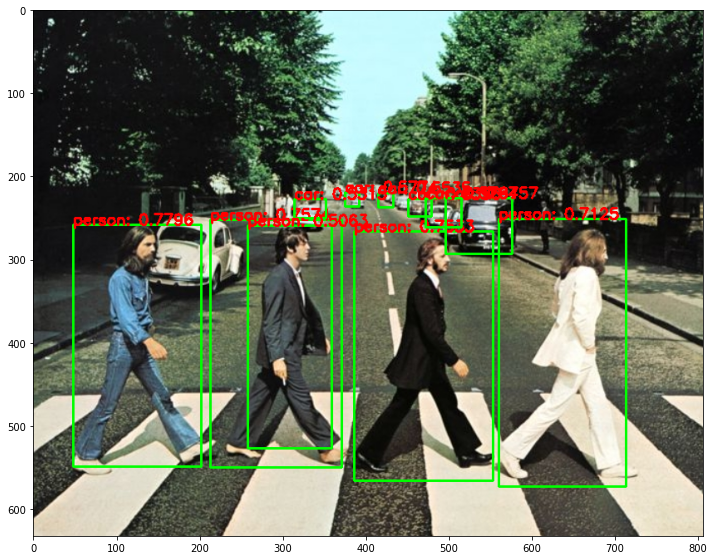

In [ ]:
cv_net_m = get_cv_detection_model('/content/pretrained_mobile/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
                       '/content/pretrained_mobile/ssd_config_02.pbtxt')

img = cv2.imread('./data/beatles01.jpg')

# Object Detetion 수행 후 시각화 
draw_img = get_detected_img_renew(cv_net_m, img, score_threshold=0.5,  is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

############ Mobile v3 Backbone 이 수행시간이 더욱 빨라짐 ############

#### **Video Inference**

In [ ]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

def do_detected_video_renew(cv_net, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        returned_frame = get_detected_img_renew(cv_net, img_frame, score_threshold=score_threshold, is_print=True)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

--2022-02-08 12:32:13--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2022-02-08 12:32:14--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2022-02-08 12:32:14--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.

In [ ]:
do_detected_video_renew(cv_net_m, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_m3.mp4', 0.2, False)

총 Frame 갯수: 58
car: 0.7007
car: 0.6426
person: 0.6268
car: 0.5965
car: 0.5591
car: 0.5143
car: 0.5111
person: 0.5018
Detection 수행시간: 0.31 초
car: 0.6978
car: 0.6462
person: 0.6340
car: 0.5995
car: 0.5576
car: 0.5123
car: 0.5123
person: 0.5040
Detection 수행시간: 0.12 초
person: 0.7225
car: 0.7070
car: 0.7001
car: 0.5805
car: 0.5615
Detection 수행시간: 0.12 초
person: 0.7266
car: 0.7232
car: 0.6871
car: 0.5425
car: 0.5372
car: 0.5029
Detection 수행시간: 0.11 초
car: 0.6832
car: 0.6009
person: 0.5702
bus: 0.5572
car: 0.5494
truck: 0.5315
Detection 수행시간: 0.12 초
person: 0.6666
car: 0.6634
car: 0.5647
car: 0.5450
bus: 0.5379
car: 0.5267
car: 0.5088
Detection 수행시간: 0.12 초
car: 0.6620
person: 0.6544
car: 0.5694
bus: 0.5468
car: 0.5366
car: 0.5303
car: 0.5074
Detection 수행시간: 0.12 초
car: 0.7102
bus: 0.6212
car: 0.5881
person: 0.5652
car: 0.5506
car: 0.5125
person: 0.5110
Detection 수행시간: 0.12 초
car: 0.6820
car: 0.6173
bus: 0.5815
person: 0.5728
car: 0.5602
Detection 수행시간: 0.11 초
car: 0.6922
car: 0.6200
bus: 0.5

## **Tensorflow Hub 에서 Pretrained 모델을 가져와 사용해보기**
* Tensorflow Hub란 모델 저장소
* Pretrained 된 모델들이 저장되어 있어 가져와 사용 가능


In [ ]:
import tensorflow as tf

# tensorflow_hub import 수행. 
import tensorflow_hub as hub

import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
!nvidia-smi

Tue Feb  8 12:51:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-02-08 12:51:31--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.01s   

2022-02-08 12:51:32 (26.4 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



### **원하는 모델명을 TF Hub 에서 검색하여 hub.load() 로 다운로드**
* 입력 이미지 값으로 4차원 Numpy array 혹은 4차원 Tensor

In [ ]:
# https://tfhub.dev/ 에서 ssd 로 해당 pretrained 모델의 URL 가져옴

module_handle = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
detector_model = hub.load(module_handle)

In [ ]:
# 4차원 Numpy array 입력
# 이미지 여러개 입력이 들어가므로

import cv2
import numpy as np
import time

# 3차원 numpy array를 4차원으로 변경
img_array_np = cv2.imread('/content/data/beatles01.jpg')
img_array = img_array_np[np.newaxis, ...]
print(img_array_np.shape, img_array.shape)

start_time = time.time()

# image를 detector_model에 인자로 입력하여 inference 수행. 
result = detector_model(img_array)
print('elapsed time:', time.time()-start_time)


(633, 806, 3) (1, 633, 806, 3)
elapsed time: 0.07712244987487793


In [ ]:
result

{'detection_anchor_indices': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
 array([[1475.,  435., 1453.,  432.,  369., 1465.,  372.,  420.,  366.,
          470.,  429.,  441.,  477., 1487.,  447.,  444.,  438.,  375.,
          477.,  501.,  450.,  435.,  617.,  477.,  593.,  423.,  363.,
          378.,  605.,  578.,  441.,  366.,  453.,  489.,  438.,  462.,
         1457.,  477.,  363.,  420., 1015., 1575.,  420., 1569.,  465.,
          489.,  495., 1555., 1472., 1569.,  495., 1543.,  474.,  477.,
          417.,  593.,  717.,  432.,  423.,  465.,  492.,  309.,  433.,
          420.,  378.,  447.,  498.,  369.,  372.,  759., 1580.,  417.,
          444.,  534.,  375.,  474.,  408.,  501.,  453.,  717., 1611.,
          450.,  651.,  462.,  495.,  498.,  426.,  821., 1520.,  720.,
          489.,  312.,  591.,  761.,  357.,  390.,  546.,  438., 1796.,
          717.]], dtype=float32)>,
 'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[0.41495627,

In [ ]:
# 4차원 tensor로 이미지를 입력 

img_tensor = tf.convert_to_tensor(img_array_np)[tf.newaxis, ...]

start_time = time.time()

# image를 detector_model에 인자로 입력하여 inference 수행. 
result2 = detector_model(img_tensor)
print('elapsed time:', time.time()-start_time)

elapsed time: 0.07573390007019043


In [ ]:
result2
print(result2.keys())

###### detect 결과는 100개를 기본으로 Detect 함(즉 Detect된 오브젝트는 무조건 100개. 그래서 tensor(array)는 100개 단위) ######
# 추후에 confidence score로 필터링 진행하면 됨

print(result['detection_boxes'].shape, result['detection_classes'].shape, result['num_detections'].shape, result['detection_scores'].shape)

dict_keys(['raw_detection_boxes', 'detection_boxes', 'detection_scores', 'raw_detection_scores', 'num_detections', 'detection_multiclass_scores', 'detection_anchor_indices', 'detection_classes'])
(1, 100, 4) (1, 100) (1,) (1, 100)


In [ ]:
# detect된 object들은 detection score가 높은 순으로 정렬됨

print('#### detection_classes #####')
print(result['detection_classes'])

#### detection_classes #####
tf.Tensor(
[[ 1.  3.  1.  3.  3.  1.  3.  3.  3.  3.  3.  3.  1.  1.  3.  3.  3.  3.
   3.  1.  3.  8.  1.  4.  1.  3.  3.  3.  1.  1.  1.  1.  3.  1.  1.  1.
   1.  2.  1.  1. 41. 15. 15.  9.  1.  3.  3.  1.  1. 15.  4.  1.  1. 15.
   1. 28. 37.  8.  1.  3.  4. 10.  3.  8.  1.  1.  3.  1.  1. 31.  9.  3.
   1.  1.  8.  3.  1.  3.  1. 31. 15.  1. 31.  3.  1.  1.  3.  1.  1. 37.
   4. 10. 31. 31.  3.  1.  1.  8.  1. 34.]], shape=(1, 100), dtype=float32)


In [ ]:
print('#### detection_scores #####')
print(result['detection_scores'])

#### detection_scores #####
tf.Tensor(
[[0.80172944 0.7356188  0.7120171  0.69413865 0.6636528  0.65565026
  0.6452407  0.603727   0.6026705  0.5842154  0.56527376 0.5350405
  0.5342654  0.5268757  0.52053607 0.5095628  0.4978297  0.4945502
  0.4944435  0.4815372  0.4632207  0.44348982 0.43932405 0.43850383
  0.4356333  0.4294043  0.4046916  0.40248072 0.4004219  0.38804975
  0.379697   0.37923127 0.3572933  0.35150284 0.3513087  0.34515974
  0.34445184 0.3431205  0.3409394  0.3407754  0.33898056 0.33623496
  0.3346396  0.32812485 0.32567793 0.3254129  0.32011735 0.3194379
  0.31624943 0.31623927 0.31335816 0.31307578 0.3130087  0.30830538
  0.30543134 0.30098662 0.29714978 0.2968763  0.2904769  0.2894469
  0.2890264  0.28901452 0.2870647  0.28292787 0.2803842  0.27541226
  0.27536196 0.27475467 0.2743941  0.27360827 0.27360633 0.27351877
  0.2709427  0.2625163  0.26132292 0.25988436 0.2586813  0.25767985
  0.25716907 0.25641942 0.2543675  0.25432613 0.25387338 0.25331077
  0.2520547  

In [ ]:
########## bounding box 좌표는 ymin, xmin, ymax, xmax 순서로 반환됨. y가 먼저, x가 나중에 나오므로 반드시 주의해야 함 !!!! ##########
# 좌표 값은 원본 이미지의 width, height로 0~1 사이값으로 정규화됨
# 원본 이미지 크기로 나중에 복구시켜야 함

print('#### detection_boxes #####')
print(result['detection_boxes'])

#### detection_boxes #####
tf.Tensor(
[[[0.41495627 0.4789078  0.8861094  0.6805986 ]
  [0.35446185 0.6193308  0.45601124 0.7103389 ]
  [0.42462415 0.07202519 0.8726056  0.24962677]
  [0.34840307 0.57042307 0.4265056  0.6450172 ]
  [0.351907   0.49550375 0.37206447 0.51862085]
  [0.43273562 0.2820462  0.8654354  0.45395404]
  [0.3487833  0.5463882  0.37784773 0.5763231 ]
  [0.3735987  0.38559082 0.41415024 0.42749032]
  [0.3549313  0.45743853 0.3715493  0.4719668 ]
  [0.3873283  0.16212597 0.54663444 0.31490028]
  [0.35574898 0.53846586 0.41043958 0.595577  ]
  [0.35995895 0.74961007 0.4518572  0.80073214]
  [0.41962263 0.37767807 0.49098232 0.41628668]
  [0.40850347 0.6971656  0.8881627  0.8754239 ]
  [0.37630147 0.8410377  0.4158867  0.88230294]
  [0.3869046  0.8088866  0.42234337 0.8531973 ]
  [0.35546145 0.66919553 0.45342818 0.7328212 ]
  [0.33963862 0.5889446  0.3827575  0.64008945]
  [0.41962263 0.37767807 0.49098232 0.41628668]
  [0.39901894 0.7998833  0.5149196  0.85316366]
  

#### **Image Inference**

In [ ]:
# 시각화 위해 result 내 Tensor value들을 numpy array로 변환

for key,value in result.items():
  print(key)

result = {key:value.numpy() for key,value in result.items()}
result

raw_detection_boxes
detection_boxes
detection_scores
raw_detection_scores
num_detections
detection_multiclass_scores
detection_anchor_indices
detection_classes


{'detection_anchor_indices': array([[1475.,  435., 1453.,  432.,  369., 1465.,  372.,  420.,  366.,
          470.,  429.,  441.,  477., 1487.,  447.,  444.,  438.,  375.,
          477.,  501.,  450.,  435.,  617.,  477.,  593.,  423.,  363.,
          378.,  605.,  578.,  441.,  366.,  453.,  489.,  438.,  462.,
         1457.,  477.,  363.,  420., 1015., 1575.,  420., 1569.,  465.,
          489.,  495., 1555., 1472., 1569.,  495., 1543.,  474.,  477.,
          417.,  593.,  717.,  432.,  423.,  465.,  492.,  309.,  433.,
          420.,  378.,  447.,  498.,  369.,  372.,  759., 1580.,  417.,
          444.,  534.,  375.,  474.,  408.,  501.,  453.,  717., 1611.,
          450.,  651.,  462.,  495.,  498.,  426.,  821., 1520.,  720.,
          489.,  312.,  591.,  761.,  357.,  390.,  546.,  438., 1796.,
          717.]], dtype=float32),
 'detection_boxes': array([[[0.41495627, 0.4789078 , 0.8861094 , 0.6805986 ],
         [0.35446185, 0.6193308 , 0.45601124, 0.7103389 ],
         

In [ ]:
# 1부터 91까지의 COCO Class id 매핑. 
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

person: 0.7767
person: 0.7362
car: 0.7209
person: 0.7084
car: 0.6868
person: 0.6846
car: 0.6652
car: 0.6145
car: 0.5854
car: 0.5724
car: 0.5606
car: 0.5341
person: 0.5228


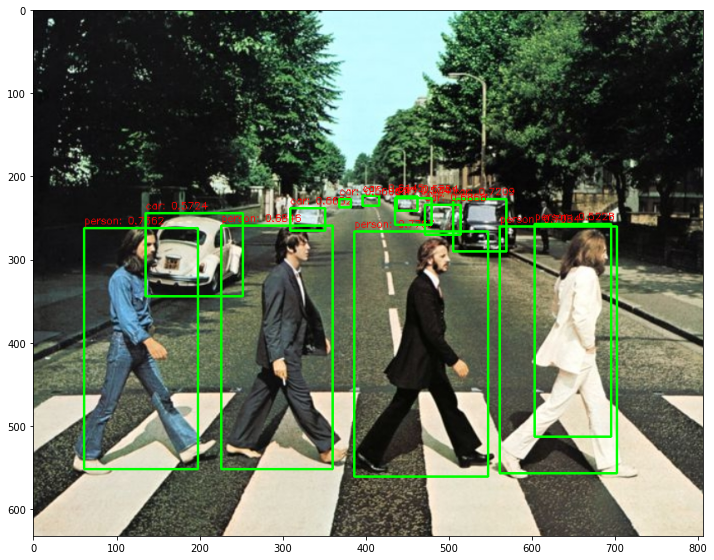

In [ ]:
import cv2

img = cv2.cvtColor(cv2.imread('/content/data/beatles01.jpg'), cv2.COLOR_BGR2RGB)

# scaling된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
height = img.shape[0]
width = img.shape[1]
# cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
draw_img = img.copy()

# bounding box의 테두리와 caption 글자색 지정
green_color=(0, 255, 0)
red_color=(255, 0, 0)

# 4차원 numpy array로 변경
img_array = img[np.newaxis, ...]
# img_tensor = tf.convert_to_tensor(img, dtype=tf.uint8)[tf.newaxis, ...]

# ssd+mobilenet v2 모델을 다운로드 한 뒤 inference 수행. 
result = detector_model(img_array)
# result 내부의 value를 numpy 로 변환. 
result = {key:value.numpy() for key,value in result.items()}

SCORE_THRESHOLD = 0.5
OBJECT_DEFAULT_COUNT = 100

# detected 된 object들을 iteration 하면서 정보 추출. detect된 object의 갯수는 100개
for i in range(min(result['detection_scores'][0].shape[0], OBJECT_DEFAULT_COUNT)):
  # detection score를 iteration시 마다 높은 순으로 추출하고 SCORE_THRESHOLD보다 낮으면 loop 중단. 
  score = result['detection_scores'][0, i]
  if score < SCORE_THRESHOLD:
    break
  # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
  box = result['detection_boxes'][0, i]

  ''' **** 주의 ******
   box는 ymin, xmin, ymax, xmax 순서로 되어 있음. '''
  left = box[1] * width
  top = box[0] * height
  right = box[3] * width
  bottom = box[2] * height

  # class id 추출하고 class 명으로 매핑
  class_id = result['detection_classes'][0, i]
  caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
  print(caption)
  #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
  cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
  cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

In [ ]:
# 함수 생성import time

def get_detected_img(model, img_array, score_threshold, object_show_count=100, is_print=True):   
  # scaling된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
  height = img_array.shape[0]
  width = img_array.shape[1]
  # cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
  draw_img = img_array.copy()

  # bounding box의 테두리와 caption 글자색 지정
  green_color=(0, 255, 0)
  red_color=(255, 0, 0)

  # cv2로 만들어진 numpy image array를 tensor로 변환
  img_array = img_array[np.newaxis, ...]
  #img_tensor = tf.convert_to_tensor(img_array, dtype=tf.uint8)[tf.newaxis, ...]

  # ssd+mobilenet v2 모델을 다운로드 한 뒤 inference 수행. 
  start_time = time.time()
  result = model(img_array)
  # result 내부의 value를 numpy 로 변환. 
  result = {key:value.numpy() for key,value in result.items()}

  # detected 된 object들을 iteration 하면서 정보 추출. detect된 object의 갯수는 100개
  for i in range(min(result['detection_scores'][0].shape[0], object_show_count)):
    # detection score를 iteration시 마다 높은 순으로 추출하고 SCORE_THRESHOLD보다 낮으면 loop 중단. 
    score = result['detection_scores'][0, i]
    if score < score_threshold:
      break
    # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
    box = result['detection_boxes'][0, i]

    ''' **** 주의 ******
    box는 ymin, xmin, ymax, xmax 순서로 되어 있음. '''
    left = box[1] * width
    top = box[0] * height
    right = box[3] * width
    bottom = box[2] * height

    # class id 추출하고 class 명으로 매핑
    class_id = result['detection_classes'][0, i]
    caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
    print(caption)
    #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
    cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
    cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

  if is_print:
    print('Detection 수행시간:',round(time.time() - start_time, 2),"초")

  return draw_img

--2022-02-08 13:35:12--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.005s  

2022-02-08 13:35:12 (13.3 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]

person: 0.8886
person: 0.8754
person: 0.8638
baseball bat: 0.5842
baseball glove: 0.5645
baseball glove: 0.5182
baseball bat: 0.5007
Detection 수행시간: 0.08 초


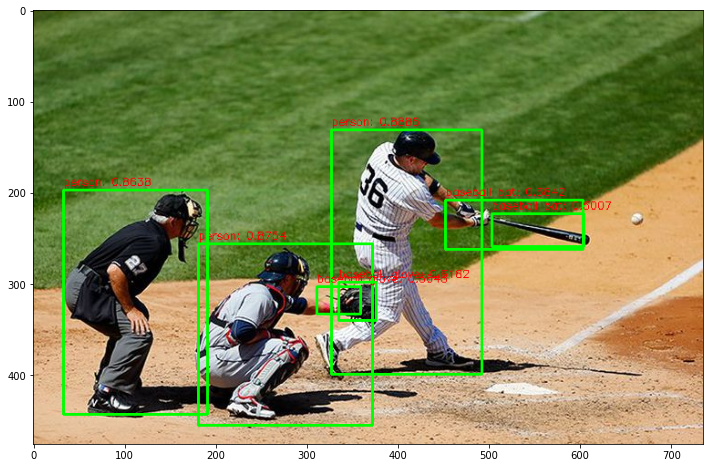

In [ ]:
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

img_array = cv2.cvtColor(cv2.imread('/content/data/baseball01.jpg'), cv2.COLOR_BGR2RGB)
draw_img = get_detected_img(detector_model, img_array, score_threshold=0.5, object_show_count=100, is_print=True)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

#### **Video Inference**

In [ ]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2022-02-08 13:36:44--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2022-02-08 13:36:45--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2022-02-08 13:36:45--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.

In [ ]:
def do_detected_video(model, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        img_frame = get_detected_img(model, img_frame, score_threshold=score_threshold, object_show_count=100, is_print=is_print)
        
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [ ]:
do_detected_video(detector_model, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_02.mp4', 0.5, True)

총 Frame 갯수: 58
car: 0.6785
car: 0.5698
car: 0.5395
Detection 수행시간: 0.17 초
car: 0.6946
car: 0.5763
car: 0.5395
Detection 수행시간: 0.08 초
motorcycle: 0.6226
person: 0.5840
car: 0.5559
Detection 수행시간: 0.08 초
car: 0.5359
person: 0.5348
car: 0.5228
Detection 수행시간: 0.08 초
car: 0.6281
car: 0.6254
motorcycle: 0.6097
person: 0.5842
Detection 수행시간: 0.09 초
car: 0.6241
person: 0.6053
car: 0.5280
Detection 수행시간: 0.08 초
car: 0.6307
person: 0.5982
car: 0.5157
Detection 수행시간: 0.08 초
car: 0.6952
person: 0.6058
motorcycle: 0.5257
motorcycle: 0.5150
Detection 수행시간: 0.09 초
person: 0.6923
car: 0.6280
motorcycle: 0.5511
car: 0.5127
Detection 수행시간: 0.08 초
person: 0.6850
car: 0.6466
car: 0.5946
motorcycle: 0.5325
Detection 수행시간: 0.08 초
car: 0.6627
car: 0.6265
person: 0.5025
Detection 수행시간: 0.09 초
car: 0.6668
car: 0.6445
person: 0.5397
motorcycle: 0.5068
Detection 수행시간: 0.09 초
person: 0.5929
car: 0.5350
Detection 수행시간: 0.08 초
person: 0.6150
car: 0.5573
car: 0.5510
person: 0.5106
person: 0.5007
Detection 수행시간: 0.0